<a href="https://colab.research.google.com/github/joshihimani/Practice_problems-/blob/master/NN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Description: neural network using tensorflow and keras to classify handwritten dataset(mnist)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import keras.backend as K

Using TensorFlow backend.


In [0]:
#Load the mnist dataset
mnist_dataset = tensorflow.keras.datasets.mnist

(x_train,y_train), (x_test,y_test) = mnist_dataset.load_data()
print(f" {x_train.shape }: is the shape for the Training data")
print(f" {y_train.shape }: is the shape for the Training Label data")
print(f" {x_test.shape }: is the shape for the Testing data")
print(f" {y_test.shape }: is the shape for the Testing Label data")


11493376/11490434 [==============================] - 0s 0us/step
 (60000, 28, 28): is the shape for the Training data
 (60000,): is the shape for the Training Label data
 (10000, 28, 28): is the shape for the Testing data
 (10000,): is the shape for the Testing Label data


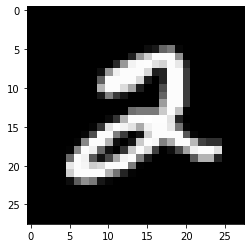

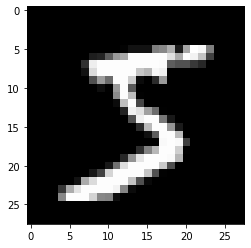

In [0]:
#print("The data in training dataset is: ", x_train[0]) # 2D training data
#Visulaizing the training dataset
count = 0
for i in y_train[:2]:
  #print(f"For {count}  label its corresponding datset is {x_train} ")
  count = count+1
  plt.imshow(x_train[i],cmap="gray")
  plt.show()

In [0]:
x_train = x_train/255.0
#print(f" {x_train.shape }: is the shape for the Training data") # Normalized training dataset
x_test = x_test/255.0
##print(f" {x_test.shape }: is the shape for the Testing data") # Normalized testing dataset

In [0]:
#Implementing neural network
neural_classifier = Sequential()
neural_classifier.add(Flatten())
neural_classifier.add(Dense(64, activation = "relu"))
#neural_classifier.add(Dense(64, activation = "relu"))
neural_classifier.add(Dense(10, activation = "softmax"))
neural_classifier.compile(optimizer = "adam",
                                       loss = "sparse_categorical_crossentropy",
                                       metrics = ["accuracy"])
EP = 3
history = neural_classifier.fit(x_train, y_train, epochs = EP, validation_split = .2)
loss, accuracy = neural_classifier.evaluate(x_test,y_test)
print("The loss for classifying the data is: ", loss)
print("The accuracy for classifying the data is: ", accuracy)

Epoch 1/3

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1500/1500 [==============================] - 3s 2ms/step - loss: 0.3355 - accuracy: 0.9040 - val_loss: 0.1852 - val_accuracy: 0.9479
Epoch 2/3
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1648 - accuracy: 0.9523 - val_loss: 0.1362 - val_accuracy: 0.9602
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1090 - accuracy: 0.9690
The loss for classifying the data is:  0.10898448526859283
The accuracy for classifying the data is:  0.968999981880188


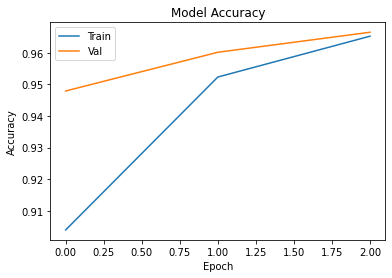

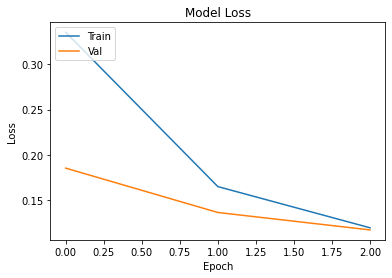

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper left')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


4


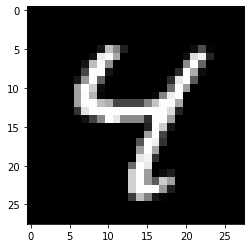

[[ 962    0    1    2    0    4    5    1    4    1]
 [   0 1120    3    1    0    1    5    0    5    0]
 [   3    0  997    9    4    1    3    7    8    0]
 [   0    0    5  986    0    2    1    6    9    1]
 [   0    0    5    0  956    0    5    1    2   13]
 [   3    1    1   15    3  853    8    0    7    1]
 [   7    2    2    1    6    5  934    0    1    0]
 [   0    8    9    7    2    0    0  984    3   15]
 [   2    0    5    8    5    3    3    5  940    3]
 [   2    5    0   11   20    3    1    7    2  958]]


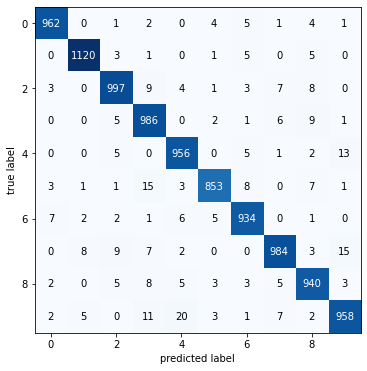

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
test_predictions = neural_classifier.predict(x_test)
print(np.argmax(test_predictions[6]))
plt.imshow(x_test[6],cmap ='gray')
plt.show()
confusion = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
fig,ax=plot_confusion_matrix(conf_mat=confusion, figsize=(8,6))
plt.tight_layout
print(confusion)

#print(confusion)
#sns.heatmap(confusion, annot=True)
#sns.heatmap(confusion/np.sum(confusion), annot=True, 
            #fmt='.01%', cmap='Blues')




In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print(recall_score(y_test, np.argmax(test_predictions, axis = 1), average='weighted'))
print(precision_score(y_test, np.argmax(test_predictions, axis = 1), average='weighted'))
print(f1_score(y_test,np.argmax(test_predictions, axis = 1), average='weighted'))
#f1_score(y_test, np.argmax(test_predictions,axis=1), average = "samples")



0.969
0.9691041020623238
0.9689986644389191
